<a href="https://colab.research.google.com/github/ArvindDs/Projects/blob/main/Decision_tree_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

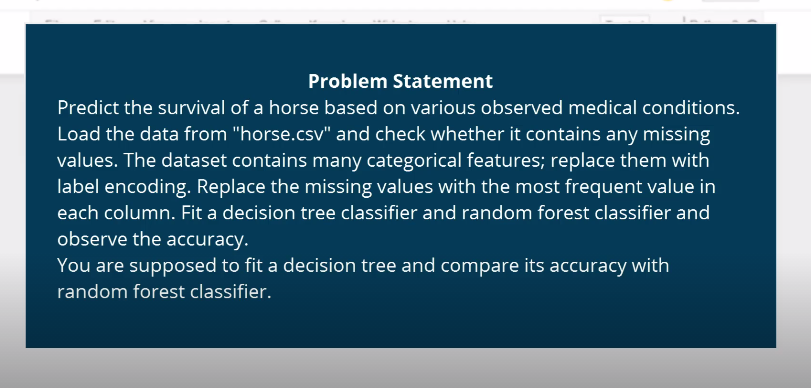

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/horse.csv')

In [ ]:
df.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [ ]:
df.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [ ]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [ ]:
Y=df['outcome']

In [ ]:
Y.unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [ ]:
X=df.drop(['outcome'],axis=1)

# **Changing Categorical variables i.e features to numerical by pd.get _dummies**

In [ ]:
category_varib= ['surgery','age','temp_of_extremities','peripheral_pulse','mucous_membrane',
                    'capillary_refill_time','pain','peristalsis','abdominal_distention','nasogastric_tube',
                    'nasogastric_reflux','rectal_exam_feces','abdomen','abdomo_appearance','surgical_lesion','cp_data']


In [ ]:
dummy=pd.get_dummies(X[category_varib])

In [ ]:
dummy.head()

,surgery_no,surgery_yes,age_adult,age_young,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_absent,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_3,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,peristalsis_absent,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_moderate,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_none,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_less_1_liter,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,rectal_exam_feces_absent,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
2,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
X=pd.concat([X,dummy],axis=1)

In [ ]:
X.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,surgery_no,surgery_yes,age_adult,age_young,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_absent,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_bright_pink,...,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_3,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,peristalsis_absent,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_moderate,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_none,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_less_1_liter,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,rectal_exam_feces_absent,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,no,11300,0,0,no,1,0,1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,no,2208,0,0,no,0,1,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,no,0,0,0,yes,1,0,1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,yes,2208,0,0,yes,0,1,0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,no,4300,0,0,no,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
X=X.drop(['surgery','age','temp_of_extremities','peripheral_pulse','mucous_membrane',
                    'capillary_refill_time','pain','peristalsis','abdominal_distention','nasogastric_tube',
                    'nasogastric_reflux','rectal_exam_feces','abdomen','abdomo_appearance','surgical_lesion','cp_data'],axis=1)

In [ ]:
X.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,surgery_no,surgery_yes,age_adult,age_young,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_absent,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_3,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,peristalsis_absent,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_moderate,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_none,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_less_1_liter,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,rectal_exam_feces_absent,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,530101,38.5,66.0,28.0,NaN,45.0,8.4,NaN,11300,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,534817,39.2,88.0,20.0,NaN,50.0,85.0,2.0,2208,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
2,530334,38.3,40.0,24.0,NaN,33.0,6.7,NaN,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
3,5290409,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
4,530255,37.3,104.0,35.0,NaN,74.0,7.4,NaN,4300,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
X.dtypes

hospital_number                      int64
rectal_temp                        float64
pulse                              float64
respiratory_rate                   float64
nasogastric_reflux_ph              float64
                                    ...   
abdomo_appearance_serosanguious      uint8
surgical_lesion_no                   uint8
surgical_lesion_yes                  uint8
cp_data_no                           uint8
cp_data_yes                          uint8
Length: 67, dtype: object

## **Use of label encoder for changing target varable to numerical you can also do it by pd.get_dummies**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
Y=label_encoder.fit_transform(Y)
Y
# Y is outcome died enthusisad and lived coding is 0,1 and 2 

array([0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1,
       1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0,
       0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2,
       2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
X['surgery_no'].value_counts()

0    180
1    119
Name: surgery_no, dtype: int64

In [ ]:
X['surgery_yes'].value_counts()

1    180
0    119
Name: surgery_yes, dtype: int64

In [ ]:
X.shape

(299, 67)

In [ ]:
X_train.shape

(239, 67)

In [ ]:
X_test.shape

(60, 67)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 66 to 69
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hospital_number                   239 non-null    int64  
 1   rectal_temp                       196 non-null    float64
 2   pulse                             222 non-null    float64
 3   respiratory_rate                  196 non-null    float64
 4   nasogastric_reflux_ph             44 non-null     float64
 5   packed_cell_volume                219 non-null    float64
 6   total_protein                     215 non-null    float64
 7   abdomo_protein                    82 non-null     float64
 8   lesion_1                          239 non-null    int64  
 9   lesion_2                          239 non-null    int64  
 10  lesion_3                          239 non-null    int64  
 11  surgery_no                        239 non-null    uint8  
 12  surgery_

## Missing Values

In [ ]:
X_train.isna().sum()

hospital_number                      0
rectal_temp                         43
pulse                               17
respiratory_rate                    43
nasogastric_reflux_ph              195
                                  ... 
abdomo_appearance_serosanguious      0
surgical_lesion_no                   0
surgical_lesion_yes                  0
cp_data_no                           0
cp_data_yes                          0
Length: 67, dtype: int64

In [ ]:
X_train.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,surgery_no,surgery_yes,age_adult,age_young,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_absent,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_3,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,peristalsis_absent,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_moderate,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_none,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_less_1_liter,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,rectal_exam_feces_absent,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
count,2.390000e+02,196.000000,222.000000,196.000000,44.000000,219.000000,215.000000,82.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,1.048243e+06,38.156633,70.243243,30.923469,4.709091,46.468037,24.307442,2.986585,3489.171548,107.397490,9.242678,0.393305,0.606695,0.924686,0.075314,0.079498,0.347280,0.271967,0.096234,0.020921,0.020921,0.384937,0.334728,0.108787,0.079498,0.066946,0.276151,0.129707,0.179916,0.008368,0.635983,0.246862,0.129707,0.184100,0.125523,0.246862,0.117155,0.234310,0.133891,0.426778,0.054393,0.234310,0.242678,0.104603,0.230126,0.225941,0.075314,0.343096,0.125523,0.125523,0.389121,0.267782,0.167364,0.041841,0.205021,0.234310,0.163180,0.046025,0.096234,0.071130,0.146444,0.163180,0.129707,0.347280,0.652720,0.673640,0.326360
std,1.484182e+06,0.706459,27.699001,18.415692,1.937250,10.439708,27.379101,1.909868,5015.215563,721.476349,142.888332,0.489509,0.489509,0.264451,0.264451,0.271082,0.477105,0.445907,0.295531,0.143419,0.143419,0.487602,0.472886,0.312025,0.271082,0.250452,0.448031,0.336686,0.384924,0.091285,0.482163,0.432091,0.336686,0.388379,0.332006,0.432091,0.322280,0.424455,0.341250,0.495648,0.227268,0.424455,0.429602,0.306683,0.421796,0.419078,0.264451,0.475740,0.332006,0.332006,0.488574,0.443733,0.374084,0.200646,0.404564,0.424455,0.370305,0.209979,0.295531,0.257581,0.354292,0.370305,0.336686,0.477105,0.477105,0.469865,0.469865
min,5.213990e+05,36.000000,30.000000,9.000000,1.000000,24.000000,3.300000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

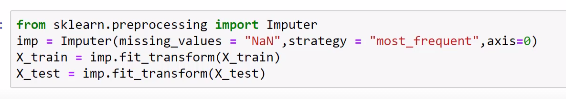

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.NaN, strategy='mean',axis=0)
x_train=imputer.fit_transform(X_train)
X_test=imputer.fit_transform(X_test)

TypeError: ignored

In [ ]:
X_train.isna().sum()

hospital_number                      0
rectal_temp                         43
pulse                               17
respiratory_rate                    43
nasogastric_reflux_ph              195
                                  ... 
abdomo_appearance_serosanguious      0
surgical_lesion_no                   0
surgical_lesion_yes                  0
cp_data_no                           0
cp_data_yes                          0
Length: 67, dtype: int64

In [ ]:
#Taking mean for all  three missing variables.
X['rectal_temp'].value_counts()

38.0    25
38.5    19
38.3    18
37.8    17
38.2    16
38.6    12
38.1    12
37.5    12
38.4    11
37.6     7
37.7     7
37.2     7
38.7     7
37.9     7
38.8     6
37.3     6
39.2     5
39.3     4
38.9     4
39.5     4
39.0     4
37.4     3
39.4     3
37.1     3
40.3     2
36.5     2
37.0     2
39.1     2
36.0     1
40.0     1
36.4     1
39.9     1
35.4     1
36.9     1
39.6     1
36.1     1
36.8     1
40.8     1
39.7     1
36.6     1
Name: rectal_temp, dtype: int64

In [ ]:
X['pulse'].value_counts()  
                     

48.0     27
60.0     25
40.0     18
88.0     12
52.0     12
100.0    11
44.0     11
72.0     11
120.0    10
42.0     10
80.0      8
64.0      8
96.0      8
84.0      8
54.0      7
56.0      7
50.0      6
66.0      6
68.0      5
104.0     5
70.0      4
76.0      4
92.0      4
78.0      3
90.0      3
108.0     3
86.0      3
36.0      3
112.0     3
130.0     2
140.0     2
124.0     2
114.0     2
45.0      2
150.0     2
30.0      2
146.0     1
136.0     1
184.0     1
164.0     1
129.0     1
65.0      1
132.0     1
49.0      1
98.0      1
38.0      1
160.0     1
128.0     1
110.0     1
46.0      1
75.0      1
82.0      1
Name: pulse, dtype: int64

In [ ]:
X['respiratory_rate'].value_counts()

20.0    27
24.0    27
16.0    22
12.0    19
30.0    19
40.0    17
36.0    16
28.0    13
32.0    11
18.0     8
48.0     6
14.0     4
60.0     4
35.0     3
68.0     3
10.0     3
80.0     3
44.0     3
42.0     3
90.0     2
84.0     2
70.0     2
21.0     2
96.0     2
22.0     2
51.0     2
9.0      2
50.0     2
72.0     1
23.0     1
15.0     1
34.0     1
25.0     1
8.0      1
52.0     1
58.0     1
13.0     1
66.0     1
26.0     1
88.0     1
Name: respiratory_rate, dtype: int64

In [ ]:
X['nasogastric_reflux_ph'].value_counts()


2.0    9
7.0    8
6.5    5
5.0    4
5.5    4
3.0    3
4.5    3
4.0    3
1.0    2
7.5    2
6.0    1
5.7    1
5.3    1
3.5    1
4.3    1
7.2    1
6.2    1
4.4    1
5.4    1
1.5    1
Name: nasogastric_reflux_ph, dtype: int64

In [ ]:
X['respiratory_rate'].value_counts()

20.0    27
24.0    27
16.0    22
12.0    19
30.0    19
40.0    17
36.0    16
28.0    13
32.0    11
18.0     8
48.0     6
14.0     4
60.0     4
35.0     3
68.0     3
10.0     3
80.0     3
44.0     3
42.0     3
90.0     2
84.0     2
70.0     2
21.0     2
96.0     2
22.0     2
51.0     2
9.0      2
50.0     2
72.0     1
23.0     1
15.0     1
34.0     1
25.0     1
8.0      1
52.0     1
58.0     1
13.0     1
66.0     1
26.0     1
88.0     1
Name: respiratory_rate, dtype: int64

In [ ]:
mean1=X_train['rectal_temp'].mean()

In [ ]:
mean2=X_train['pulse'].mean()

In [ ]:
mean3=X_train['respiratory_rate'].mean()

In [ ]:
mean4=X_train['nasogastric_reflux_ph'].mean()

In [ ]:
X_train['rectal_temp'].replace(np.NaN,mean1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
X_train['pulse'].replace(np.NaN,mean2,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
X_train['respiratory_rate'].replace(np.NaN,mean3,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
X_train['nasogastric_reflux_ph'].replace(np.NaN,mean4,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
X_train.isna().sum()

hospital_number                     0
rectal_temp                         0
pulse                               0
respiratory_rate                   43
nasogastric_reflux_ph               0
                                   ..
abdomo_appearance_serosanguious     0
surgical_lesion_no                  0
surgical_lesion_yes                 0
cp_data_no                          0
cp_data_yes                         0
Length: 67, dtype: int64

In [ ]:
# removing missing values  from testing data

In [ ]:
mean5=X_train['rectal_temp'].mean()
mean6=X_train['pulse'].mean()
mean7=X_train['respiratory_rate'].mean()
mean8=X_train['nasogastric_reflux_ph'].mean()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=1)
clf.fit(X_train,Y_train)

ValueError: ignored

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)


NameError: ignored

<Figure size 1080x720 with 0 Axes>